In [3]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
with open('done_nan.csv', 'r') as f:
    df = pd.read_csv(f)
df.head()

aerosol  year  month  day  hour  Temp(C)  Prec(mm)  Humidity(%)   
0    102.0  2013      3   19     7      6.4       0.0         99.0  \
1    108.0  2013      3   19     8      7.2       0.0         96.0   
2    100.0  2013      3   19     9      9.1       0.0         90.0   
3     94.0  2013      3   19    10     11.1       0.0         79.0   
4     80.0  2013      3   19    11     12.9       0.0         74.0   

   Dew_Point(C)  Solar_Radiation(MJ/m2)  Snowfall(cm)  3hr_New_Snowfall(cm)   
0           6.2                    0.01           0.0                   0.0  \
1           6.5                    0.24           0.0                   0.0   
2           7.5                    0.73           0.0                   0.0   
3           7.5                    1.34           0.0                   0.0   
4           8.3                    1.82           0.0                   0.0   

   Cloud_Cover(1/10)  Middle_Low_Cloud_Cover(1/10)  Lowest_Cloud_Height(100m)   
0                7.0                           7.0                       10.0  \
1                7.0                           7.0                       10.0   
2                3.0                           3.0                       10.0   
3                0.0                           0.0                       10.0   
4                0.0                           0.0                       10.0   

   Visibility(10m)  30cm_Ground_Temperature(C)      power        d2m   
0            300.0                         9.9     9600.0  281.82224  \
1            300.0                         9.8   816000.0  281.86746   
2            300.0                         9.8  2899200.0  282.04712   
3            400.0                         9.7  5472000.0  282.88538   
4            400.0                         9.7  7401600.0  282.98697   

         t2m                 time  
0  286.23135  2013-03-19 07:00:00  
1  285.86597  2013-03-19 08:00:00  
2  285.64914  2013-03-19 09:00:00  
3  284.99387  2013-03-19 10:00:00  
4  284.90920  2013-03-19 11:00:00

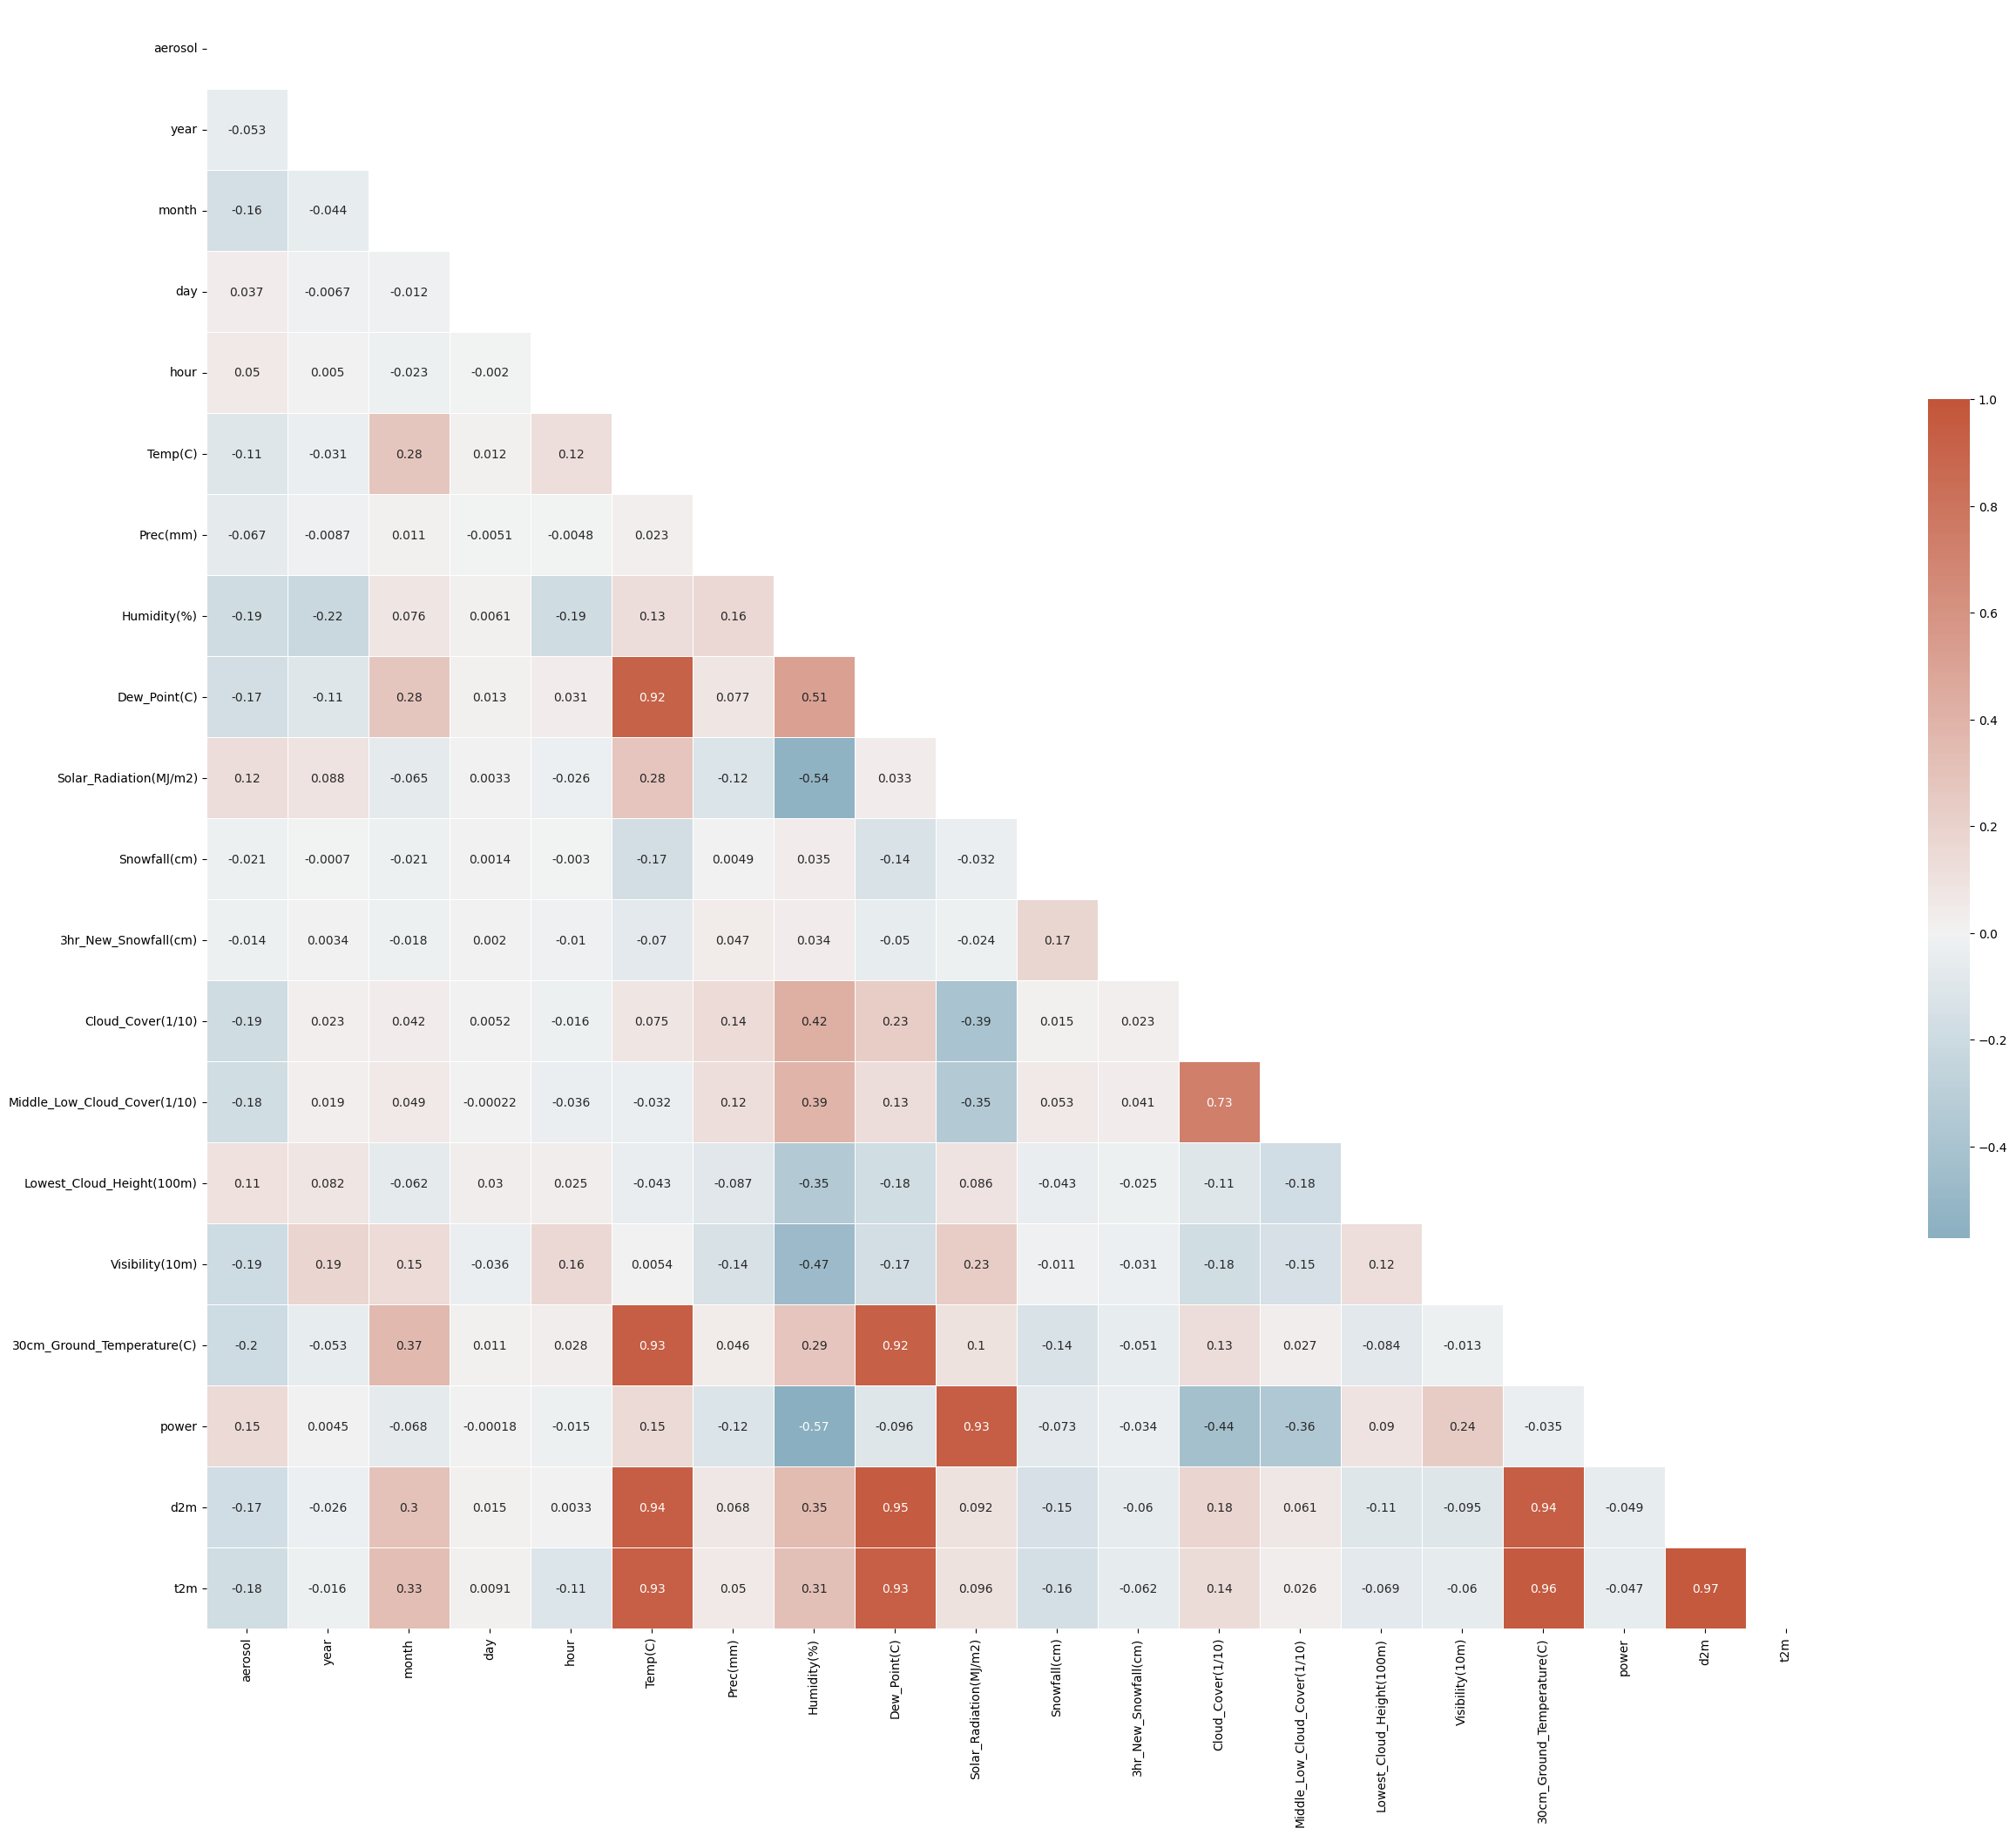

In [5]:
# 숫자 데이터만 있는 열을 선택하여 새로운 데이터프레임 생성
numeric_columns = df.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

# Correlation Matrix 히트맵 생성
f, ax = plt.subplots(figsize=(30, 25))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

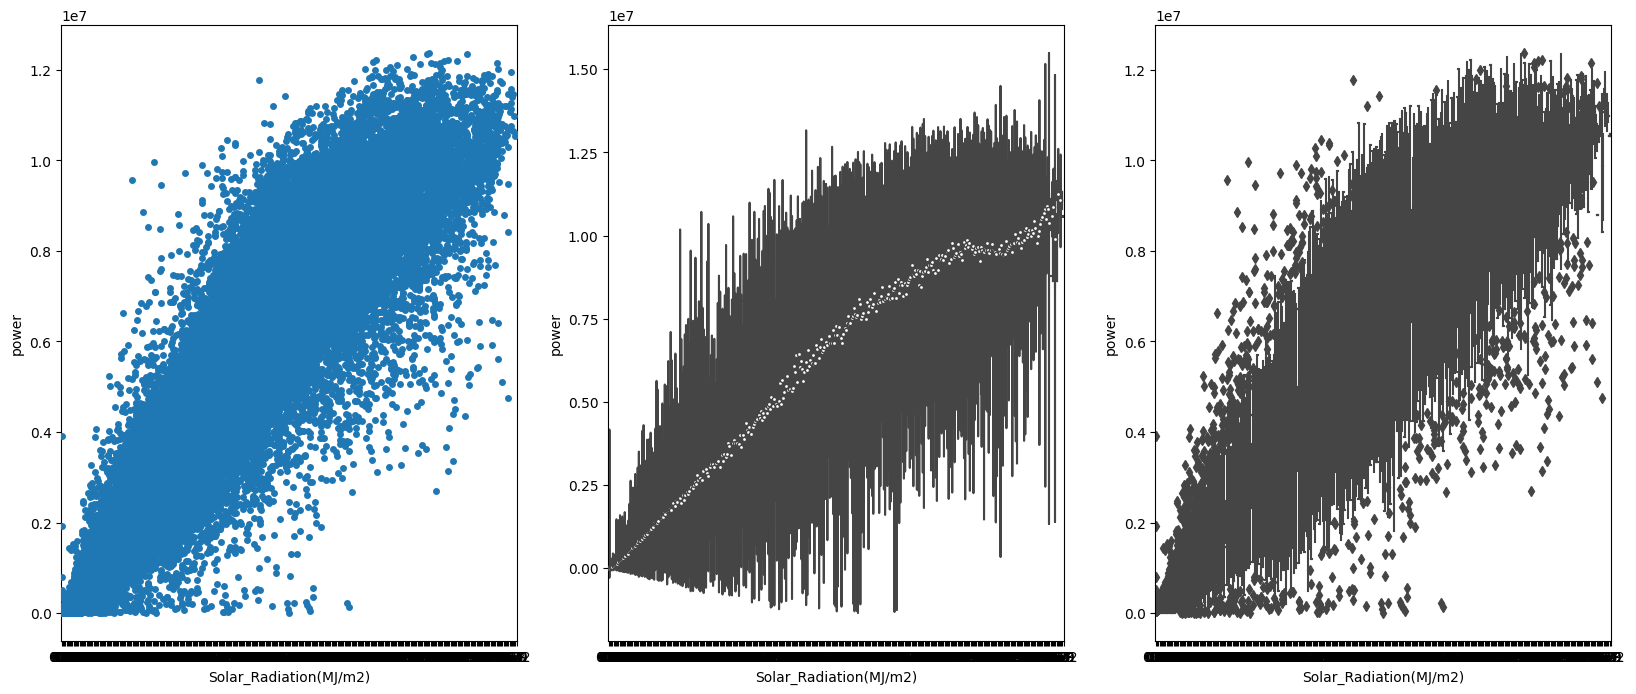

In [8]:
figure, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.stripplot(data=df, x='Solar_Radiation(MJ/m2)', y='power', ax=ax[0])
sns.violinplot(data=df, x='Solar_Radiation(MJ/m2)', y='power', ax=ax[1])
sns.boxplot(data=df, x='Solar_Radiation(MJ/m2)', y='power', ax=ax[2])
plt.show()